In [ ]:
import numpy as np
import pandas as pd


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import missingno as mno
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.io as pio
color_pal = sns.color_palette()
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

<ipython-input-3-ededa7af3fac>:10: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/ds_salaries.csv")

# New Section

In [ ]:
pd.set_option("display.max_columns", None)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
df.select_dtypes(include=[object])

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M
...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USD,US,US,L
3751,MI,FT,Principal Data Scientist,USD,US,US,L
3752,EN,FT,Data Scientist,USD,US,US,S
3753,EN,CT,Business Data Analyst,USD,US,US,L


In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [ ]:

# Check for duplicated rows
duplicates = df.duplicated()

# Count the number of duplicated rows
num_duplicates = duplicates.sum()
num_duplicates

1171

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
pip install pandas-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c0586c94bc91432e8ec6c7e127b971261772b2ee7c2f1204f0a2411d6e3a5961
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_e

In [ ]:
!pip install pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport

# Create a comprehensive profile report for the DataFrame 'df'
profile = ProfileReport(df)


ImportError: ignored

#Data visualization

In [ ]:
# Calculate the median salary for each work year
trends = df.groupby('work_year')['salary_in_usd'].median().reset_index()


fig_monthly_trends = px.line(
    trends,  # DataFrame containing the data
    x='work_year',   # x-values: work years
    y='salary_in_usd',  # y-values: median salary
    labels={'work_year': 'Year'},  # Customize label for the x-axis
    title='Salary Trends Yearly',  # Set the title of the plot
    height=650  # Set the height of the plot
)

# Display the plot
fig_monthly_trends.show()

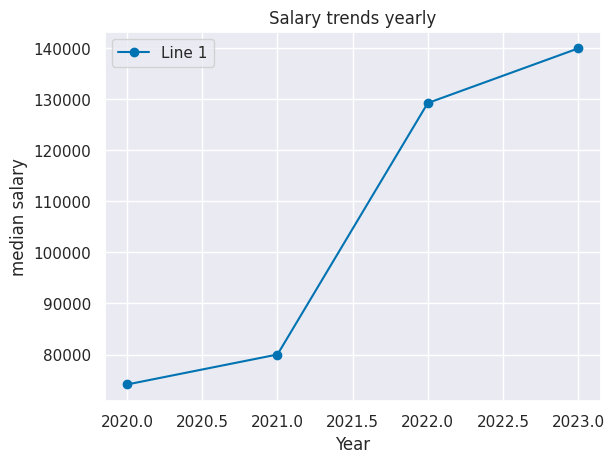

In [ ]:
import matplotlib.pyplot as plt
trends = df.groupby('work_year')['salary_in_usd'].median().reset_index()
x = trends['work_year']
y = trends['salary_in_usd']
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Line 1')

# Adding labels and a title
plt.xlabel('Year')
plt.ylabel('median salary')
plt.title('Salary trends yearly')

# Adding a legend
plt.legend()

# Display the chart
plt.show()


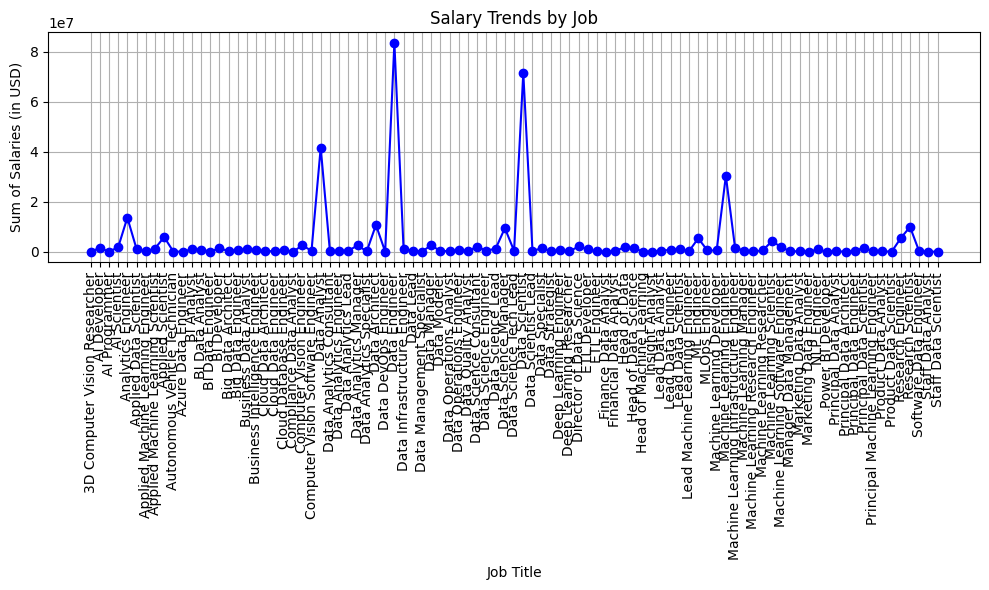

In [ ]:
monthly_trends = df.groupby('job_title')['salary_in_usd'].sum().reset_index()

job_titles = monthly_trends['job_title']
sum_of_salaries = monthly_trends['salary_in_usd']

# Create a line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(job_titles, sum_of_salaries, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Job Title')
plt.ylabel('Sum of Salaries (in USD)')
plt.title('Salary Trends by Job')
plt.grid(True)  # Add a grid for better visualization

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 3.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import missingno as mno
import plotly.offline as pyo
import plotly.figure_factory as ff

# x-axis: "company_size", y-axis: "salary_in_usd", color-coded by "experience_level"
fig = px.bar(df, x="company_size", y="salary_in_usd", color="experience_level")

# Update the layout of the plot
fig.update_layout(
    title_text='Salary Distribution with Company Size',  # Set the title of the plot
    height=750,  # Set the height of the plot
    xaxis_title="Company Size",  # Label for the x-axis
    yaxis_title="Salary",  # Label for the y-axis
    font=dict(size=19)  # Set the font size and family for the text
)

# Display the plot
fig.show()

Effect of Company Size on Salary: You can see how salaries are distributed across different company sizes, as represented on the x-axis. By comparing the height of the bars for each company size category, you can infer whether there is any correlation between company size and salary levels. For example, if the bars generally increase in height as company size increases, it suggests that larger companies tend to offer higher salaries.

Impact of Experience Level on Salary: The color-coding of bars by experience level allows you to assess how experience levels influence salary within each company size category. You can compare how different experience levels are compensated within the same company size group. For instance, you can see whether senior-level employees earn more than entry-level employees and whether this pattern holds across various company sizes.

Distribution of Salaries: By examining the bars' heights, you can identify the central tendencies and variations in salary distribution within each category. For instance, you can determine the average salary for each company size and experience level. Additionally, the spread of the bars gives insights into the variation in salaries within each category.

Title and Labels: The plot is well-documented with a title, x-axis label, and y-axis label. These elements provide clarity about the plot's content and make it easier to understand.

Overall, you can conclude that this plot provides an effective visual representation of how company size and experience level impact salary distribution. It allows you to compare salary trends across different company sizes and experience levels, making it a valuable tool for data exploration and analysis. However, specific conclusions may vary based on the actual data in your DataFrame, and further analysis or domain-specific knowledge might be necessary to make more precise inferences.







In [ ]:

import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Calculate the average salary for each job title and sort in descending order
average_salary = df.groupby('job_title')['salary_in_usd'].mean().reset_index()
average_salary = average_salary.sort_values(by='salary_in_usd', ascending=False)

# Select the top 10 job titles with the highest average salary
top_10_expensive_salary = average_salary.head(10)

# Create a new figure using Plotly
fig = go.Figure()

# Add a bar trace to the figure
fig.add_trace(go.Bar(
    x=top_10_expensive_salary['job_title'],  # x-values: job titles
    y=top_10_expensive_salary['salary_in_usd']  # y-values: average salaries
))


In [ ]:
# Update the layout and appearance of the plot
fig.update_layout(
    title='Top 10 Jobs by Salary',  # Set the title of the plot
    xaxis_title='Job',  # Label for the x-axis
    yaxis_title='Salary',  # Label for the y-axis
    paper_bgcolor='#595964',  # Background color of the plot
    template='plotly_dark',  # Use a dark template for the plot
    font=dict(color='white'),  # Set font color to white
    height=650  # Set the height of the plot
)

# Initialize Plotly for notebook integration
pyo.init_notebook_mode(connected=True)

# Display the plot
pyo.iplot(fig)

In [ ]:
# Calculate the value counts for each unique value in the 'employment_type' column
type_grouped = df['employment_type'].value_counts()

# Define the desired order of employment types
e_type = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']

# Create a bar plot using Plotly Express
# x-axis: Employment types, y-axis: Count of each employment type,
# color-coded by employment type, and use a predefined color palette
fig = px.bar(
    x=e_type,  # x-values: employment types
    y=type_grouped.values,  # y-values: counts of each employment type
    color=type_grouped.index,  # Color the bars based on employment type
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    template='plotly_dark',  # Use a dark template for the plot
    text=type_grouped.values  # Display the count values on top of the bars
)

# Update the layout and appearance of the plot
fig.update_layout(
    title_text='Employment Type Distribution',  # Set the title of the plot
    height=650,  # Set the height of the plot
    xaxis_title="Employment Type",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic"),  # Set the font size and family for the text
)

# Adjust the width of the bars
fig.update_traces(width=0.5)

# Display the plot
fig.show()


In [ ]:
# Extract subsets of the data based on experience level
exlevel_salary = df[['experience_level','salary_in_usd']]
entry_salary = exlevel_salary.loc[exlevel_salary['experience_level'] == 'Entry-level/Junior']
executive_salary = exlevel_salary.loc[exlevel_salary['experience_level'] == 'Executive-level/Director']
mid_salary = exlevel_salary.loc[exlevel_salary['experience_level'] == 'Mid-level/Intermediate']
senior_salary = exlevel_salary.loc[exlevel_salary['experience_level'] == 'Senior-level/Expert']


In [ ]:
# Prepare data for the histogram
hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']
colors = ['white', 'yellow', 'blue', 'red']


In [ ]:
# Create a Plotly figure for bar chart
fig1 = go.Figure(data=px.bar(x=group_labels,
                            y=lst,
                            color=group_labels,
                            color_discrete_sequence=colors,
                            title='6.2.(2) Mean Salary by Experience Level',
                            text=np.round([num / 1000 for num in lst], 2),
                            template='plotly_dark',
                            height=500))

# Customize the appearance of the Plotly figure
fig1.update_traces(width=0.4)
fig1.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (k)",
    font=dict(size=17, family="Franklin Gothic"))

# Display the Plotly figure
fig1.show()

ValueError: ignored

In [ ]:
draw correlation matrix and explain

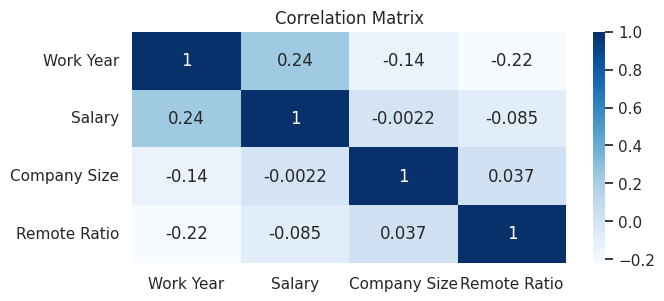

In [ ]:
# transform company size to numerical values
df['company_size'] = df['company_size'].replace('S', 1)
df['company_size'] = df['company_size'].replace('M', 2)
df['company_size'] = df['company_size'].replace('L', 3)

# plot correlation matrix between year, salary, company size, and remote ratio
fig, axs = plt.subplots(figsize=(7, 3))
corr = df[['work_year', 'salary_in_usd', 'company_size', 'remote_ratio']].corr()
sns.heatmap(corr, annot=True, ax=axs, cmap='Blues')
axs.set_title('Correlation Matrix')
axs.set_xticklabels(['Work Year', 'Salary', 'Company Size', 'Remote Ratio'])
axs.set_yticklabels(['Work Year', 'Salary', 'Company Size', 'Remote Ratio'], rotation=0)
plt.show()

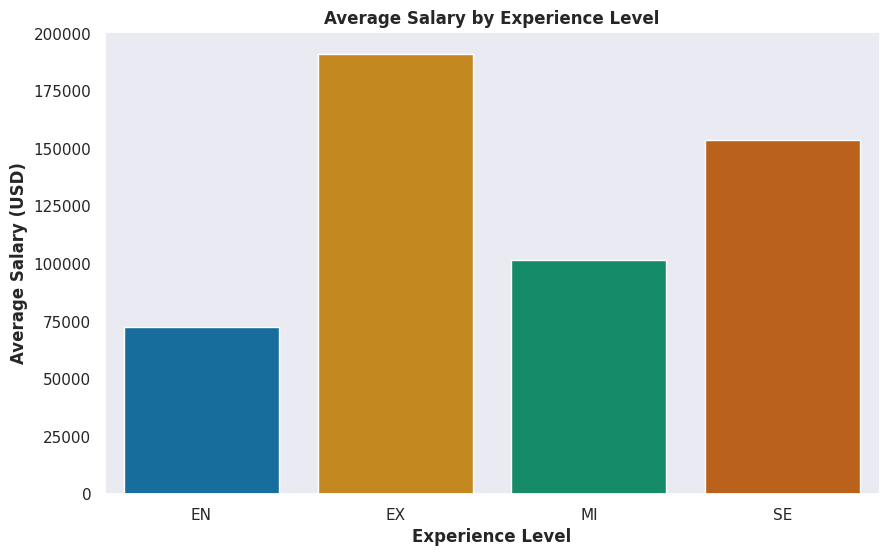

In [ ]:
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values)
plt.title('Average Salary by Experience Level', fontsize=12, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

# Remove the grid lines
ax.grid(False)

plt.show()

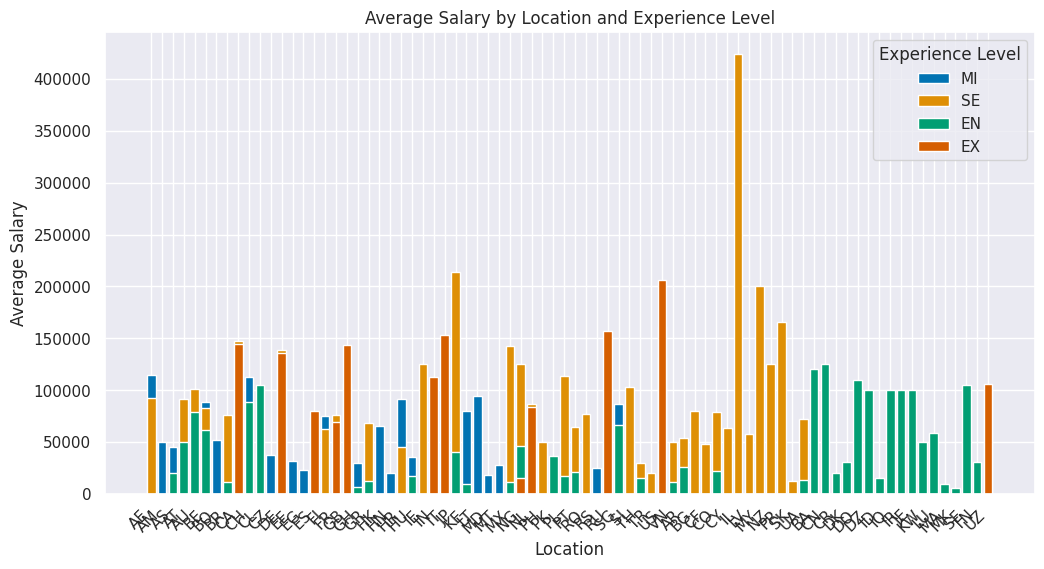

In [ ]:

average_salaries = df.groupby(['employee_residence', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Visualize Data
# Example: Create a bar plot for average salaries by location and experience level
plt.figure(figsize=(12, 6))
for exp_level in average_salaries['experience_level'].unique():
    exp_data = average_salaries[average_salaries['experience_level'] == exp_level]
    plt.bar(exp_data['employee_residence'], exp_data['salary_in_usd'], label=exp_level)

plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Average Salary by Location and Experience Level')
plt.legend(title='Experience Level')
plt.xticks(rotation=45, ha='right')
plt.show()


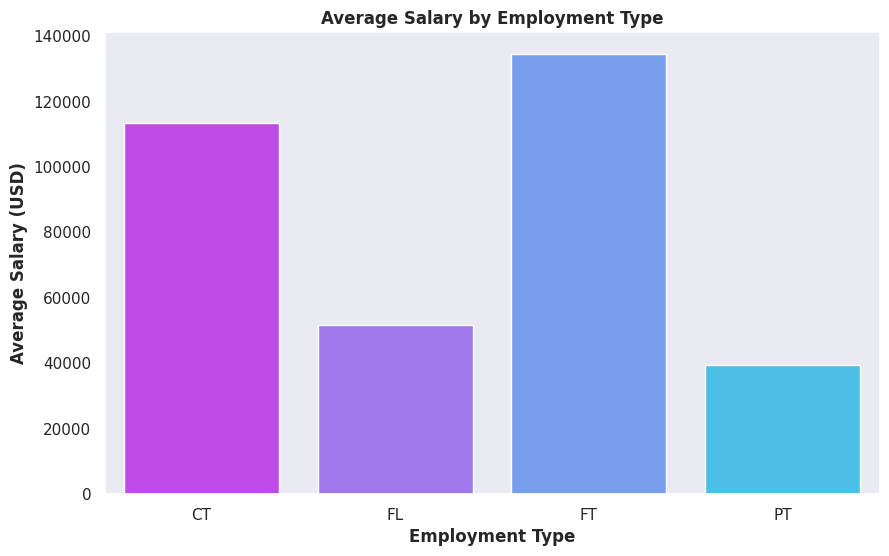

In [ ]:
#Group data by 'employment_type' and calculate the average salary for each type
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'cool_r')
plt.title('Average Salary by Employment Type', fontsize=12, fontweight='bold')
plt.xlabel('Employment Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=12, fontweight='bold')

p.grid(False)

plt.show()

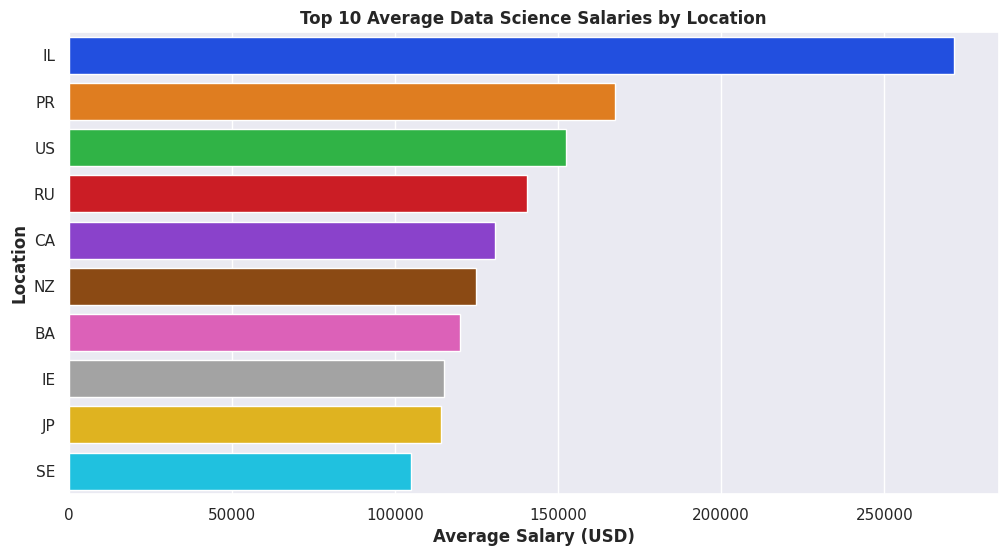

In [ ]:
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Select the top N locations to plot
top_n_locations = 10  # You can change this number as needed

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(12, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(top_n_locations), palette = 'bright')
plt.title('Top {} Average Data Science Salaries by Location'.format(top_n_locations), fontsize=12, fontweight='bold' )
plt.xlabel('Average Salary (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Location', fontsize=12, fontweight='bold')
plt.show()


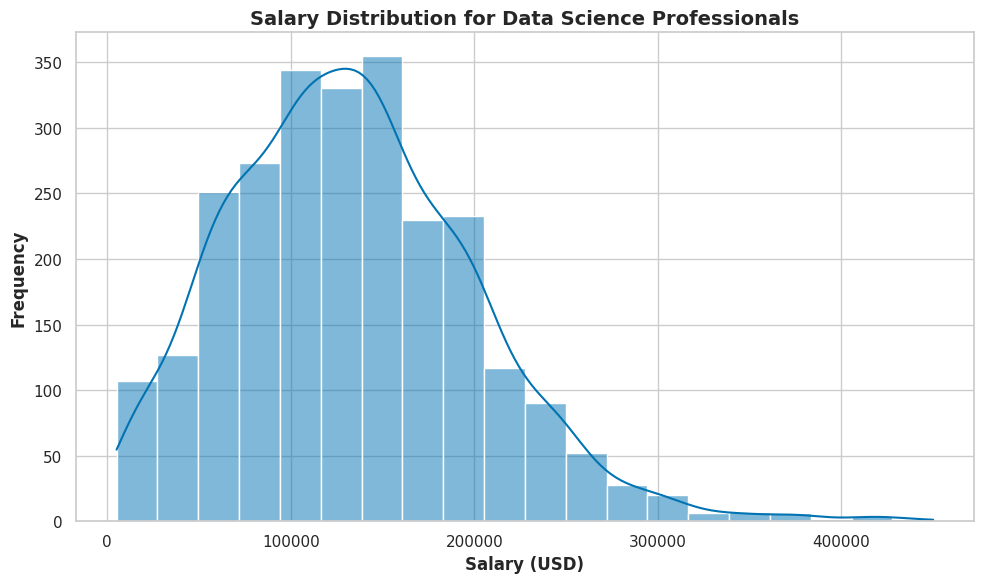

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df['salary_in_usd'], kde=True, bins=20, ax=ax)

# Customize labels and title
ax.set_title('Salary Distribution for Data Science Professionals', fontsize=14, fontweight='bold')
ax.set_xlabel('Salary (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Remove y-axis ticks
ax.tick_params(axis='y', which='both', left=False)


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
desired_experience_level = 'Entry-Level'
desired_salary_range = (5132, 90000)  # Replace with the desired salary range in USD

# Filter the dataset based on experience level and desired salary range
filtered_df = df[(df['experience_level'] == desired_experience_level) &
                 (df['salary_in_usd'] >= desired_salary_range[0]) &
                 (df['salary_in_usd'] <= desired_salary_range[1])]

# Count the occurrences of each job title
job_title_counts = filtered_df['job_title'].value_counts()
job_title_counts.columns = ['Job Title', 'Count']

# Create a horizontal bar chart using Seaborn with a different color palette
plt.figure(figsize=(10, 8))

ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts)
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
# Remove the grid lines
ax.grid(False)

# Show the chart
plt.tight_layout()
plt.show()

ValueError: ignored

<Figure size 1000x800 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if there are any rows in the filtered dataset
if not filtered_df.empty:
    job_title_counts = filtered_df['job_title'].value_counts().reset_index()
    job_title_counts.columns = ['Job Title', 'Count']

    # Create a horizontal bar chart using Seaborn with a different color palette
    plt.figure(figsize=(10, 8))

    ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette='rainbow')
    plt.xlabel('Count', fontsize=12, fontweight='bold')
    plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
    plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=0, fontsize=10, fontweight='bold')
    # Remove the grid lines
    ax.grid(False)

    # Show the chart
    plt.tight_layout()
    plt.show()
else:
    print("No data matching the specified criteria.")


No data matching the specified criteria.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if there are any rows in the filtered dataset
if not filtered_df.empty:
    job_title_counts = filtered_df['job_title'].value_counts()

    # Create a horizontal bar chart using Seaborn with a different color palette
    plt.figure(figsize=(10, 8))

    ax = sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='rainbow')
    plt.xlabel('Count', fontsize=12, fontweight='bold')
    plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
    plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=0, fontsize=10, fontweight='bold')
    # Remove the grid lines
    ax.grid(False)

    # Show the chart
    plt.tight_layout()
    plt.show()
else:
    print("No data matching the specified criteria.")


No data matching the specified criteria.


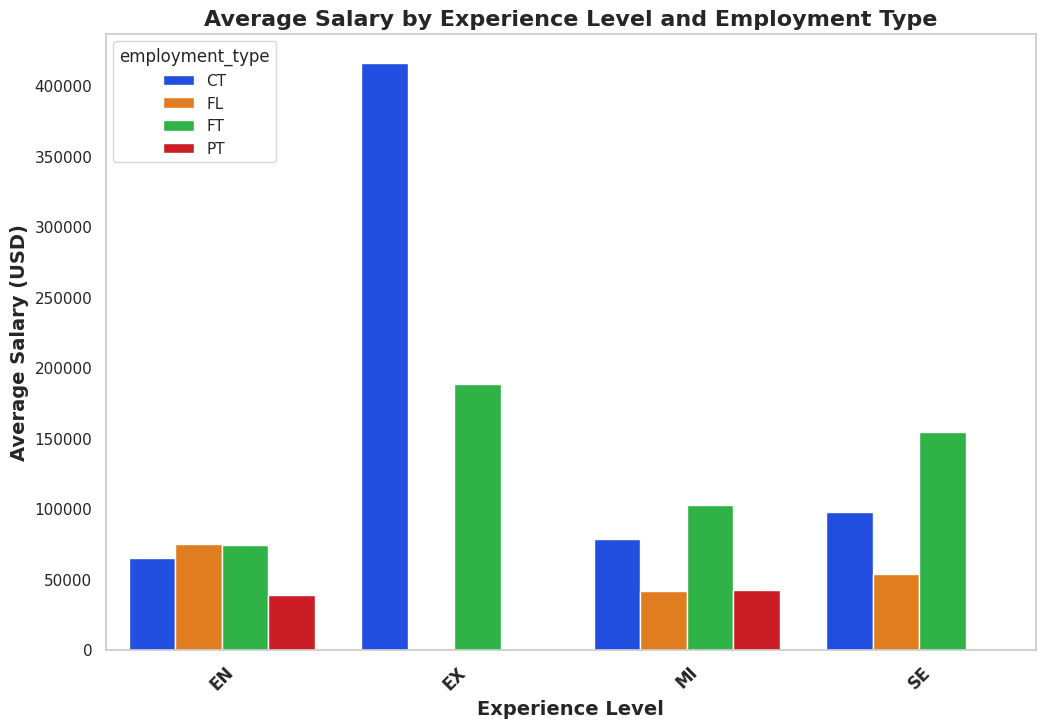

In [ ]:
# Calculate average salary for each combination of experience level and employment type
cost_effectiveness = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Find the combination with the highest average salary (maximum cost-effectiveness)
best_combination = cost_effectiveness.loc[cost_effectiveness['salary_in_usd'].idxmax()]

# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))


ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=cost_effectiveness)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

# Remove the grid lines
ax.grid(False)

# Show the plot
plt.show()
